In [25]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sldata import SessionData

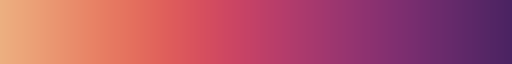

In [26]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
sns.color_palette("flare", as_cmap=True)

In [27]:
mouse_id = "7004"
session_id = "o3"
experiment = "clickbait-odor"

print("=== Testing SessionData Class ===")
print(f"Loading data for {mouse_id}_{session_id}...")

data = SessionData(
    mouse_id=mouse_id,
    session_id=session_id,
    experiment=experiment,
    min_spikes=50,
    verbose=True)

=== Testing SessionData Class ===
Loading data for 7004_o3...
Successfully loaded spike_times from S:\clickbait-odor\kilosorted\7004\o3\spike_times.npy
Successfully loaded spike_templates from S:\clickbait-odor\kilosorted\7004\o3\spike_templates.npy
Successfully loaded templates from S:\clickbait-odor\kilosorted\7004\o3\templates.npy
Successfully loaded sniff from S:\clickbait-odor\preprocessed\7004\o3\sniff.npy
Loaded data: ['spike_times', 'spike_templates', 'templates', 'sniff']
Successfully loaded events from S:\clickbait-odor\bonsai\7004\o3\events.csv
Video properties: 888x1968, 30.0 FPS, 108815 frames
Filtering and decimating sniff signal from 30kHz to 1kHz...
Found 26914 peaks in sniff signal
Peak times range: 97.0 - 3635311.0 ms
Loaded 19 clusters for 7004_o3
Loaded sniff data: 3635400 samples
Found 26914 sniff events


In [28]:
data.events.head()

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,water_left,water_right,reward_state,click,speed,direction,drinking,timestamp_ms,flip_state
0,0,2025-05-23 14:02:34.929523200,False,False,345,1731,46.0,False,True,False,False,False,0.000000,0.000000,False,4969,False
1,0,2025-05-23 14:02:34.966208000,False,False,343,1734,46.0,False,True,False,False,False,3.605551,0.000046,False,5002,False
2,0,2025-05-23 14:02:34.989337600,False,False,338,1743,46.0,False,True,False,False,False,10.295630,0.000137,False,5035,False
3,0,2025-05-23 14:02:35.016870400,False,False,337,1745,46.0,False,True,False,False,False,2.236068,0.000031,False,5069,False
4,0,2025-05-23 14:02:35.040358400,False,False,338,1745,46.0,False,True,False,False,False,1.000000,0.000000,False,5102,False


Created population matrix: 19 neurons x 7255 time bins
Time range: 4969.0 - 3632125.0 ms
Bin size: 500 ms
Applied z-scoring to neurons


Text(0.5, 0, '500ms bins')

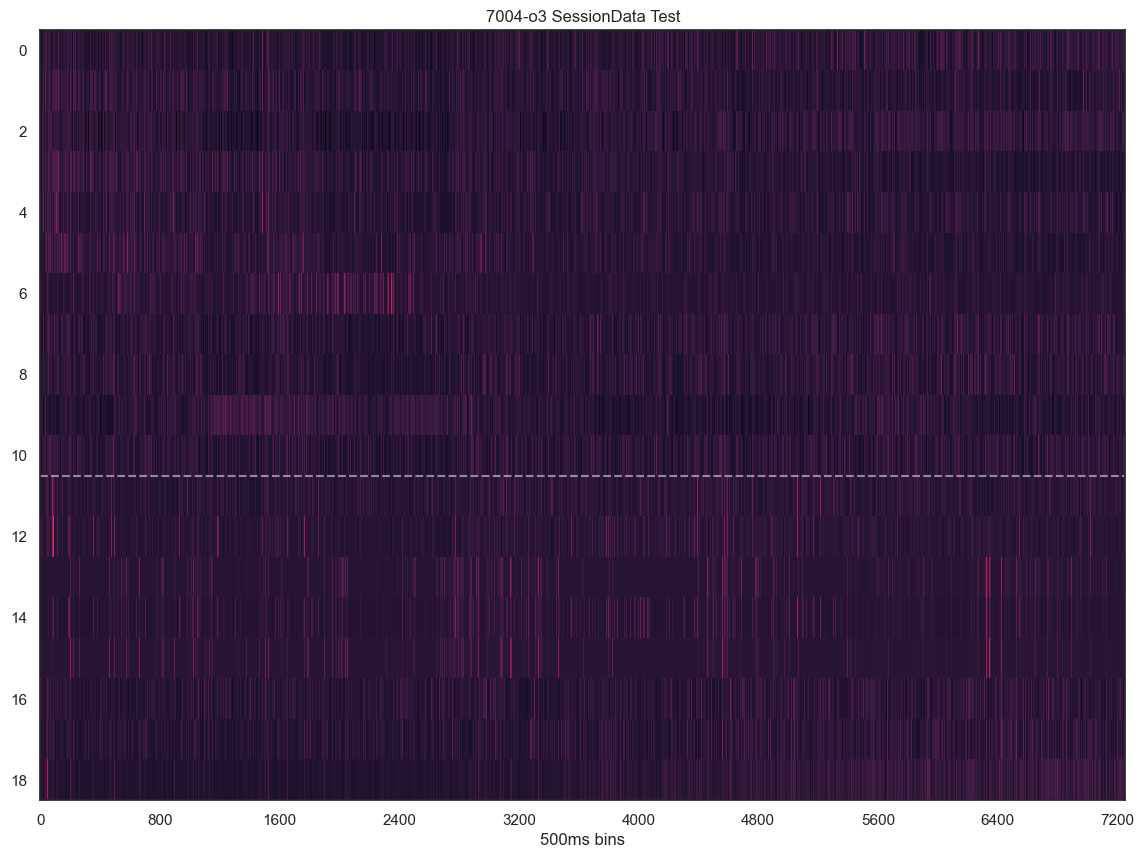

In [29]:
### Population Raster
start_time=data.events['timestamp_ms'].iloc[0]
end_time=data.events['timestamp_ms'].iloc[-1]
bin_size_ms=500

pop_matrix, time_bins, included_clusters = data.create_population_raster(
    start_time=start_time,
    end_time=end_time, 
    bin_size_ms=bin_size_ms,
    zscore_neurons=True,
    cluster_ids=None
)

from matplotlib.ticker import MaxNLocator
# Check when regions switch
for ii in range(len(data.clusters)):
    if data.clusters[ii]['best_channel'] > 16:
        region_line = ii
        break

plt.imshow(pop_matrix, aspect='auto', interpolation='nearest')
plt.xticks(range(pop_matrix.shape[1]))  # One tick per column
plt.yticks(range(pop_matrix.shape[0]))  # One tick per row
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.axhline(region_line-.5, c='w', linestyle='dashed', alpha=.5)
# plt.axvline(int(data.duration)//2//bin_size_ms, c='w', linestyle='dashed', alpha=.5)
plt.title(f"{mouse_id}-{session_id} SessionData Test")
plt.xlabel(f"{bin_size_ms}ms bins")

In [30]:
n_bins = pop_matrix.shape[1]
indices = np.linspace(0, len(data.events)-1, n_bins, dtype=int)
events_binned =  data.events.iloc[indices]

In [31]:
events_binned

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,water_left,water_right,reward_state,click,speed,direction,drinking,timestamp_ms,flip_state
0,0,2025-05-23 14:02:34.929523200,False,False,345,1731,46.0,False,True,False,False,False,0.000000,0.000000,False,4969,False
15,0,2025-05-23 14:02:35.406259200,False,False,336,1741,46.0,False,True,False,False,False,3.162278,1.570751,False,5469,False
30,0,2025-05-23 14:02:35.911628800,False,False,335,1743,46.0,False,True,False,False,False,1.000000,0.000000,False,5969,False
45,0,2025-05-23 14:02:36.406835200,False,False,332,1733,46.0,False,True,False,False,False,2.236068,0.785406,False,6469,False
60,0,2025-05-23 14:02:36.911129600,False,False,331,1718,46.0,False,True,False,False,False,1.000000,1.570796,False,6969,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108753,59,2025-05-23 15:03:00.380403200,False,False,252,1288,38.0,False,False,False,False,False,45.705578,0.000687,False,3630091,True
108768,59,2025-05-23 15:03:00.878912000,False,False,234,1597,38.0,False,False,False,False,False,8.544003,0.000122,False,3630591,True
108783,59,2025-05-23 15:03:01.380224000,False,False,207,1675,38.0,False,False,False,False,False,2.828427,1.570766,False,3631091,True
108798,59,2025-05-23 15:03:01.879654400,False,False,239,1643,38.0,False,False,False,False,False,3.162278,1.570781,False,3631591,True


In [32]:
hc_pop_matrix = pop_matrix[:region_line]
ob_pop_matrix = pop_matrix[region_line:]

scaled_binned_data = StandardScaler().fit_transform(pop_matrix.T)
hc_scaled_binned_data = StandardScaler().fit_transform(hc_pop_matrix.T)
ob_scaled_binned_data = StandardScaler().fit_transform(ob_pop_matrix.T)

print(f"HC population matrix: {hc_scaled_binned_data.shape}")
print(f"OB population matrix: {ob_scaled_binned_data.shape}")

HC population matrix: (7255, 11)
OB population matrix: (7255, 8)


In [33]:
import umap
reducer = umap.UMAP()  # Play with settings!
embedding = reducer.fit_transform(scaled_binned_data)
hc_embedding = reducer.fit_transform(hc_scaled_binned_data)
ob_embedding = reducer.fit_transform(ob_scaled_binned_data)
embedding.shape

(7255, 2)

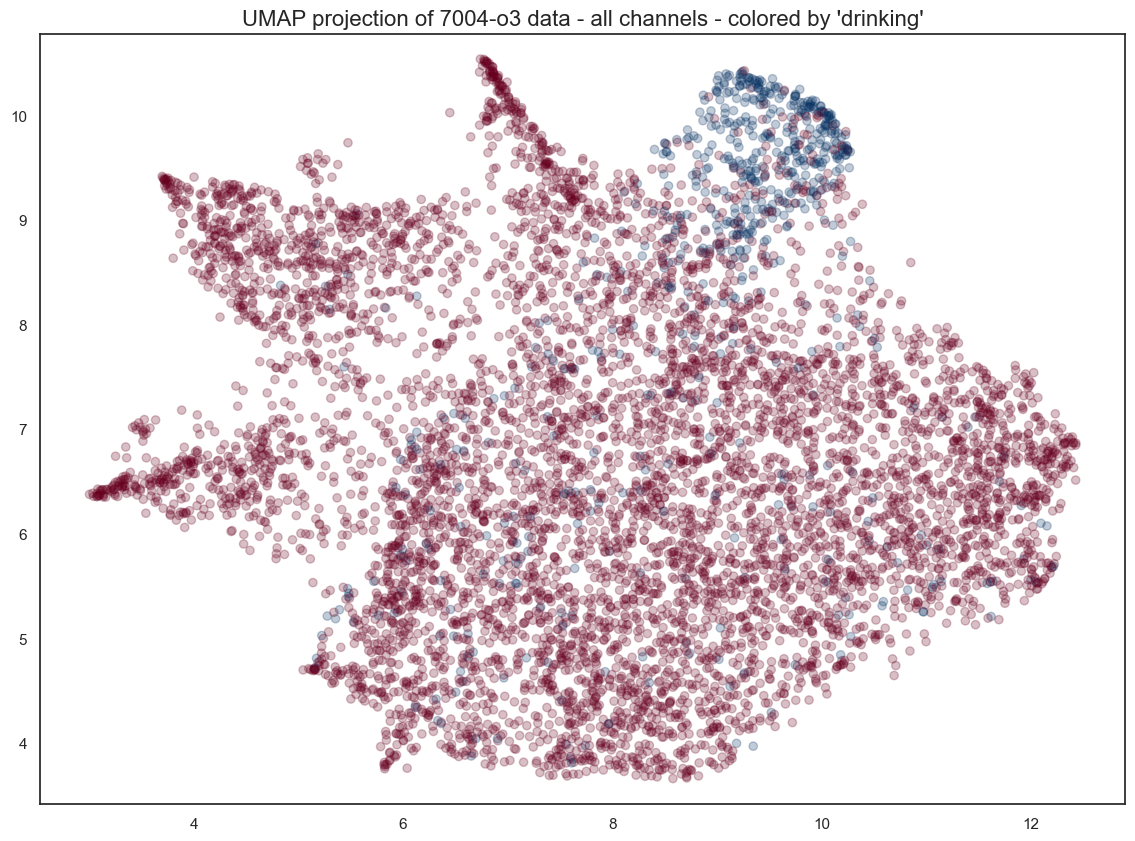

In [41]:
event: str = 'drinking'

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=events_binned[event],
    cmap='RdBu',
    alpha=.25)
plt.gca().set_aspect('equal', 'datalim')
plt.title(f"UMAP projection of {mouse_id}-{session_id} data - all channels - colored by '{event}'", fontsize=16);

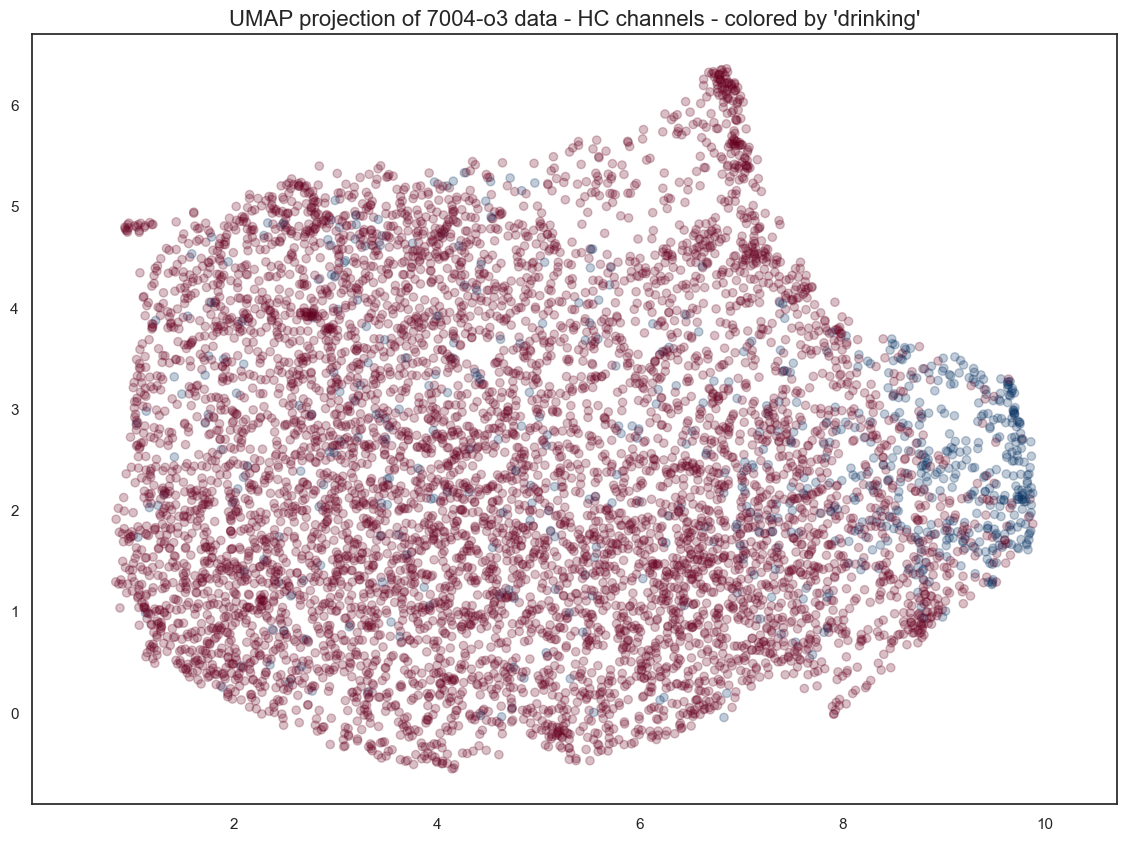

In [43]:
plt.scatter(
    hc_embedding[:, 0],
    hc_embedding[:, 1],
    c=events_binned[event],
    cmap='RdBu',
    alpha=.25)
plt.gca().set_aspect('equal', 'datalim')
plt.title(f"UMAP projection of {mouse_id}-{session_id} data - HC channels - colored by '{event}'", fontsize=16);

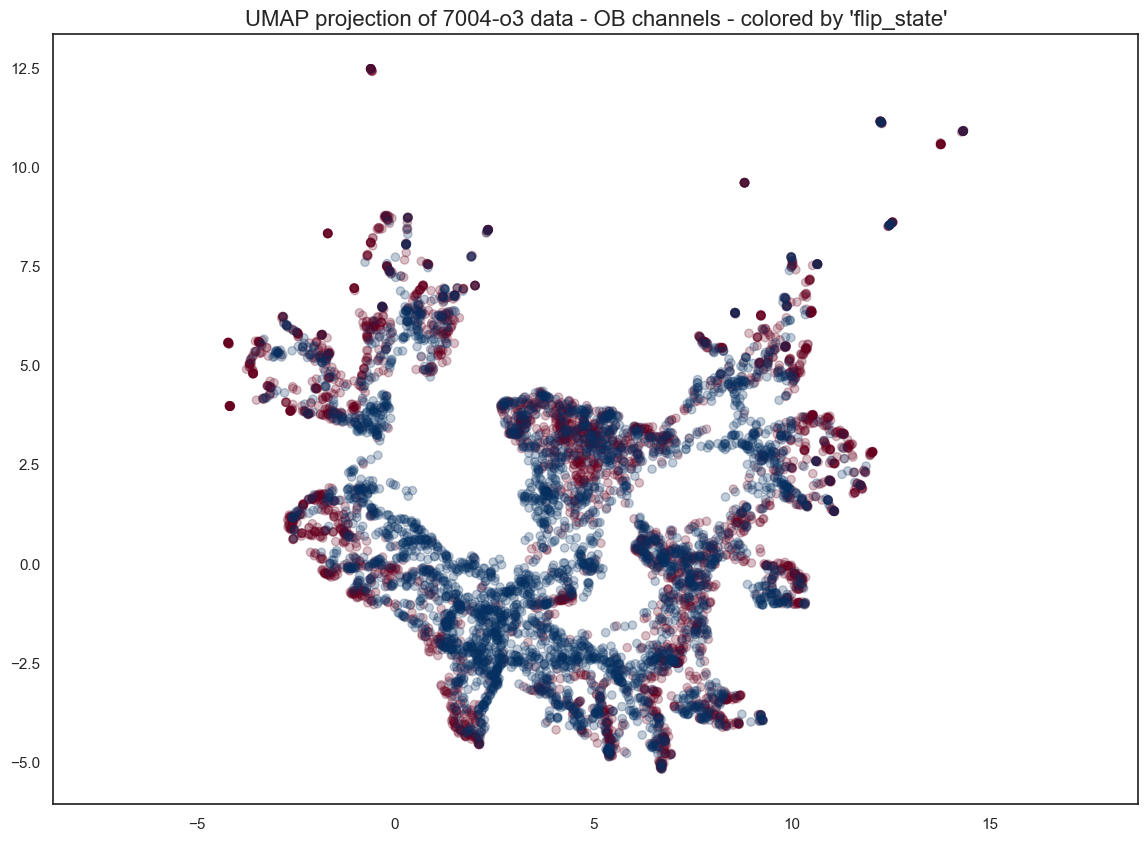

In [36]:
plt.scatter(
    ob_embedding[:, 0],
    ob_embedding[:, 1],
    c=events_binned[event],
    cmap='RdBu',
    alpha=.25)
plt.gca().set_aspect('equal', 'datalim')
plt.title(f"UMAP projection of {mouse_id}-{session_id} data - OB channels - colored by '{event}'", fontsize=16);